# **Exploring Hashing**
MSDS 432 Module 5

Nameyeh Alam

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import random
import string
import warnings
warnings.filterwarnings("ignore", category=Warning)
import time

### Define sorting function

In [2]:
# quicksort 
def quicksort(array):
  if len(array) < 2:
    # base case, 
    # arrays with 0 or 1 element 
    # are already "sorted"
    return array
  else:
    # recursive case
    pivot = array[0]
    # sub-array of all 
    # the elements less than the pivot
    less = [i for i in array[1:] if i <= pivot]
    # sub-array of all 
    # the elements greater than the pivot
    greater = [i for i in array[1:] if i > pivot]
    return quicksort(less) + [pivot] + quicksort(greater)
print(quicksort([10, 5, 2, 3]))

[2, 3, 5, 10]


### Define search functions 

In [3]:
# define function for simple search (sequential/linear search)
def simple_search(list, item):
    for i in list:
        if i == item:
            return i
    # Return none if item does not exist
    return None
# binary search 
def binary_search(list, item):
  # low and high keep track of which part of the list you'll search in.
  low = 0
  high = len(list) - 1
  # While you haven't narrowed it down to one element ...
  while low <= high:
    # ... check the middle element
    mid = (low + high) // 2
    guess = list[mid]
    # Found the item.
    if guess == item:
      return mid
    # The guess was too high.
    if guess > item:
      high = mid - 1
    # The guess was too low.
    else:
      low = mid + 1
  # Item doesn't exist
  return None

# 1. Create three datasets
- (1) an unsorted list of names,
- (2) a set of those same names, and
- (3) a sorted list of the same names.  

In [3]:
# Create a list of 100,000 names (randomly pick 10 characters e.g. abcdefghij, any order is fine, 
# just make sure there are no duplicates in the name) and store those names in an unsorted list.
random.seed(5)
array1_unsrt = [''.join(random.choices(string.ascii_letters, k = 10)) for _ in range(100000)]

In [4]:
# store the above names in a set (https://docs.python.org/3.7/library/stdtypes.html ). 
array1_unsrt_set = set(array1_unsrt)
# check for duplicates by comparing lengths of list and set 
print(len(array1_unsrt))
len(array1_unsrt_set)

100000


100000

Make a separate copy of the list and sort it using any sorting algorithm that you have learned so far and justify why are you using it. Capture the time it takes to sort the list.

## Sort using quicksort
As we learned last week, quicksort is a fast algorithm that has a best/average big O time complexity of O(n log n), so we will use it to sort the list. 

In [5]:
# make copy of list 
array1copy=array1_unsrt.copy()

# sort copy of list 
import time
start = time.perf_counter()
array1_srt = quicksort(array1copy)
end = time.perf_counter()
array1_srt_time = (end - start)*1000 # convert to milliseconds 
print("QUICK SORT --- SORT TIME:")
array1_srt_time

QUICK SORT --- SORT TIME:


265.75272699999977

In [6]:
print(array1_unsrt[0:5])
print(array1_srt[0:5])
# array1_set

['GMPXMVbyXH', 'UfymCDaloV', 'NiPhGgaTkl', 'ZTpXCJkWJY', 'UpsihdpFaJ']
['AADMWdEbDp', 'AAEShwMdUN', 'AAGERGYgFE', 'AAGeZcgPpu', 'AAGwhDqQza']


# 2. Pick search terms
Pick the names from the unsorted array that are at 10,000th, 30,000th, 50,000th, 70,000th, 90,000th, and 100,000th positions, and store them in a temporary array somewhere for later use.

In [7]:
positions = [10000, 30000, 50000, 70000, 90000, 100000]
positions0 = []
for x in positions:
    y=x-1
    positions0.append(y)
print(positions0)

array1_unsrt_temp=[]
for n in range(len(positions0)):
    x=positions0[n]  
    array1_unsrt_temp.append(array1_unsrt[x])
array1_unsrt_temp

[9999, 29999, 49999, 69999, 89999, 99999]


['GmuoLEHbUX',
 'vcmIvQBaAF',
 'qZIFgwgfWH',
 'tPzidAnhdq',
 'vJPJZTzjWu',
 'wJyYhozKGK']

# 3. Search using linear search, binary search, & set (hash) lookup
Now search for these six names in each of the collections.  Use linear search for the unsorted list, binary search for the sorted list, and use the set.remove() (or the in keyword) builtin for the set.  Capture the time it takes using all three algorithms.

In [8]:
# test previously defined search functions 
print(simple_search(array1_unsrt,array1_unsrt_temp[0]))
z=(binary_search(array1_srt,array1_unsrt_temp[0]))
array1_srt[z]

GmuoLEHbUX


'GmuoLEHbUX'

In [9]:
# time for linear/simple search (unsorted list)
search_unsrt = []
search_unsrt_time = []
for n in array1_unsrt_temp:
    import time
    start = time.perf_counter()
    y = simple_search(array1_unsrt,n)
    end = time.perf_counter()
    time = (end - start)*1000 # convert to milliseconds 
    print(y)
    search_unsrt_time.append(time)
search_unsrt_time

GmuoLEHbUX
vcmIvQBaAF
qZIFgwgfWH
tPzidAnhdq
vJPJZTzjWu
wJyYhozKGK


[0.23660600000008358,
 0.6865450000002049,
 1.384241999999869,
 1.874910000000174,
 2.132363999999942,
 2.435393999999924]

In [10]:
# time for binary search (sorted list)
search_srt_time = []
for n in array1_unsrt_temp:
    import time
    start = time.perf_counter()
    y = binary_search(array1_srt,n)
    end = time.perf_counter()
    time = (end - start)*1000 # convert to milliseconds 
    print(array1_srt[y])
    search_srt_time.append(time)
search_srt_time

GmuoLEHbUX
vcmIvQBaAF
qZIFgwgfWH
tPzidAnhdq
vJPJZTzjWu
wJyYhozKGK


[0.010667000000186277,
 0.007273000000029839,
 0.013576000000181665,
 0.01551499999985495,
 0.017455000000055065,
 0.016000000000016]

In [11]:
# time for set lookup (unsorted list)
search_set_time=[]
for n in array1_unsrt_temp:
    import time
    start = time.perf_counter()
    if n in array1_unsrt_set:
        end = time.perf_counter()
        print(n)
        time = (end - start)*1000 # convert to milliseconds 
        search_set_time.append(time)
search_set_time

GmuoLEHbUX
vcmIvQBaAF
qZIFgwgfWH
tPzidAnhdq
vJPJZTzjWu
wJyYhozKGK


[0.0009699999998780129,
 0.0009689999997952725,
 0.00048500000016105105,
 0.0014539999999563236,
 0.0009699999998780129,
 0.00048499999971696184]

# 4. Create a table and plot 
- comparing times of linear search, binary search and set lookup.

In [12]:
df=pd.DataFrame({'array_values':array1_unsrt_temp,
                 'simple_search_time':search_unsrt_time,
                 'binary_search_time':search_srt_time,
                 'hash_search_time':search_set_time})
df

,array_values,simple_search_time,binary_search_time,hash_search_time
0,GmuoLEHbUX,0.236606,0.010667,0.000970
1,vcmIvQBaAF,0.686545,0.007273,0.000969
2,qZIFgwgfWH,1.384242,0.013576,0.000485
3,tPzidAnhdq,1.874910,0.015515,0.001454
4,vJPJZTzjWu,2.132364,0.017455,0.000970
5,wJyYhozKGK,2.435394,0.016000,0.000485


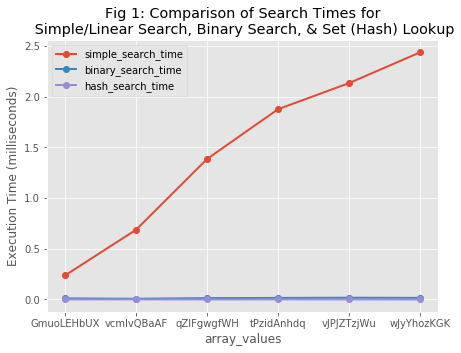

In [15]:
plt.style.use('ggplot')
plt.figure(figsize = (7,5))
plt.plot( 'array_values', 'simple_search_time', data=df, marker='o',linewidth=2,linestyle='solid')
plt.plot( 'array_values', 'binary_search_time', data=df, marker='o',linewidth=2,linestyle='solid')
plt.plot( 'array_values', 'hash_search_time', data=df, marker='o',linewidth=2,linestyle='solid')
plt.xlabel('array_values')
plt.ylabel('Execution Time (milliseconds)')
plt.title('Fig 1: Comparison of Search Times for\n Simple/Linear Search, Binary Search, & Set (Hash) Lookup')
plt.legend()
plt.show()
plt.close()

In Figure 1, we can see that search time for simple/linear increases linearly, whereas both set lookup and binary search seem to take constant time (straight line), but we need to take a close look at just binary search and set lookup to verify, since we expect set lookup to have constant time (O(1)), but binary search should be O(log n). 

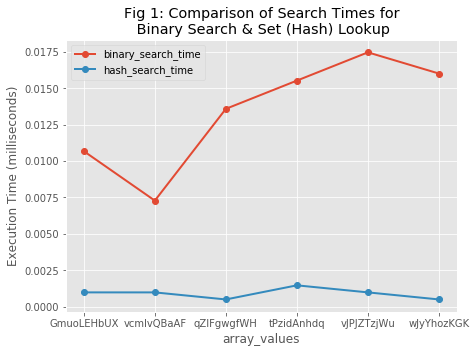

In [16]:
plt.style.use('ggplot')
plt.figure(figsize = (7,5))
plt.plot( 'array_values', 'binary_search_time', data=df, marker='o',linewidth=2,linestyle='solid')
plt.plot( 'array_values', 'hash_search_time', data=df, marker='o',linewidth=2,linestyle='solid')
plt.xlabel('array_values')
plt.ylabel('Execution Time (milliseconds)')
plt.title('Fig 1: Comparison of Search Times for\n Binary Search & Set (Hash) Lookup')
plt.legend()
plt.show()
plt.close()

In Figure 2, we see that only set lookup takes constant time to lookup values, and binary search does closely resemble what we expect a graph of O(log n) time to look like. 

# Executive Summary

In this assignment, we compared search times for simple/linear search, binary search, and set lookup. In python, a set is a container of hashable objects, so set lookup will give us an idea of how hash table lookup compares to linear and binary search. By taking the initial unsorted list and storing it in a set, we created a hash table that maps keys to values. Because of the key-value pairs, a set cannot contain duplicates, which is the reason we compared the length of the set to the length of the unsorted list to verify that there were no duplicates in the unsorted list. 

In terms of Big O time complexity, simple search takes O(n) time, binary search takes O(log n) time, and hash table lookups always take O(1) time, or constant time. Figures 1 and 2 illustrate this well, with linear search having the slowest search execution time, binary search being much faster than linear search, but hash table lookup is by far the fastest. Not only is hash table lookup the fastest, but it is *consistently* the fastest; it takes constant time (O(1)), so the size of the hash table doesn't impact run time, which can be a huge advantage to data engineeers when considering data structure options and search algorithms. 